
# NHS Submission



In [24]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [25]:
! git clone https://github.com/nhsengland/Digdata

fatal: destination path 'Digdata' already exists and is not an empty directory.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [26]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')
# convert 'YEAR_MONTH' to datetime format
pca_regional_drug_summary_df['YEAR_MONTH'] = pd.to_datetime(pca_regional_drug_summary_df['YEAR_MONTH'],format='%Y%m')
# columns of pca_regional_drug_summary
print(pca_regional_drug_summary_df.columns)
display(pca_regional_drug_summary_df)

Index(['YEAR', 'YEAR_MONTH', 'REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE', 'ITEMS',
       'COST'],
      dtype='object')


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,2021-01-01,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,2021-01-01,LONDON,Agomelatine,411,18227.63
2,2021,2021-01-01,MIDLANDS,Agomelatine,252,12344.56
3,2021,2021-01-01,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,2021-01-01,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,2024-10-01,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,2024-10-01,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,2024-10-01,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,2024-10-01,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [27]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')
# convert to datetime format
pca_regional_summary_df['YEAR_MONTH'] = pd.to_datetime(pca_regional_summary_df['YEAR_MONTH'], format='%Y%m')
# columns of pca_regional_summary
print(pca_regional_summary_df.columns)
display(pca_regional_summary_df)

Index(['YEAR_MONTH', 'REGION_NAME', 'ITEMS', 'COST'], dtype='object')


,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,2021-01-01,EAST OF ENGLAND,796466,3406002.61
1,2021-01-01,LONDON,678021,3205663.66
2,2021-01-01,MIDLANDS,1249416,5698605.43
3,2021-01-01,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,2021-01-01,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,2024-10-01,MIDLANDS,1515794,3650020.71
318,2024-10-01,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,2024-10-01,NORTH WEST,1196871,2687352.76
320,2024-10-01,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [28]:
top_drugs_df =pca_regional_drug_summary_df.groupby(by='BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum()
top_drugs_df =top_drugs_df.sort_values(ascending=False)
top_drugs_df =top_drugs_df.head(10)
display(top_drugs_df)


,ITEMS
BNF_CHEMICAL_SUBSTANCE,
Sertraline hydrochloride,85402251
Amitriptyline hydrochloride,59272937
Citalopram hydrobromide,52891620
Mirtazapine,46335570
Fluoxetine hydrochloride,28211759
Venlafaxine,21447209
Duloxetine hydrochloride,14262656
Escitalopram,6580386
Paroxetine hydrochloride,4886615


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [29]:
monthly_mir_cost_df=pca_regional_drug_summary_df.query("BNF_CHEMICAL_SUBSTANCE=='Mirtazapine'")
monthly_mir_cost_df.groupby(by='YEAR_MONTH')['COST'].sum()

,COST
YEAR_MONTH,
2021-01-01,2380030.90
2021-02-01,2249220.63
2021-03-01,2523008.14
2021-04-01,2039348.02
2021-05-01,1935629.32
2021-06-01,2055820.88
2021-07-01,1609248.23
2021-08-01,1539582.17
2021-09-01,1621383.70


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [30]:
# print(pca_regional_drug_summary_df.columns)
sertraline_midlands_df=pca_regional_drug_summary_df.query("BNF_CHEMICAL_SUBSTANCE=='Sertraline hydrochloride' and REGION_NAME=='MIDLANDS'")
sertraline_midlands_df=sertraline_midlands_df.groupby(by='YEAR')['COST'].sum()
display(sertraline_midlands_df)

,COST
YEAR,
2021,17477276.46
2022,6433863.59
2023,7600322.04
2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

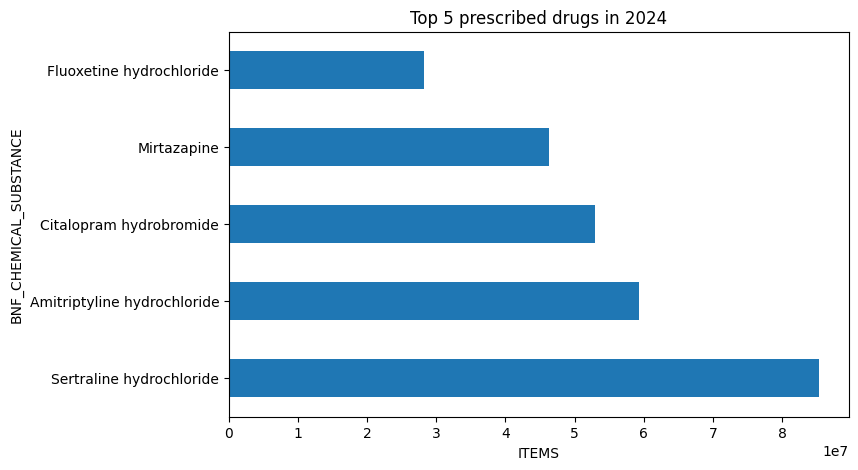

In [31]:
import matplotlib.pyplot as plt
top5_drugs_df= top_drugs_df.head(5)
# display(top5_drugs_df)
top5_drugs_df.plot( x='BNF_CHEMICAL_SUBSTANCE',y='ITEMS',kind='barh',figsize=(8, 5))
plt.xlabel('ITEMS')
plt.ylabel('BNF_CHEMICAL_SUBSTANCE')
plt.title('Top 5 prescribed drugs in 2024')
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


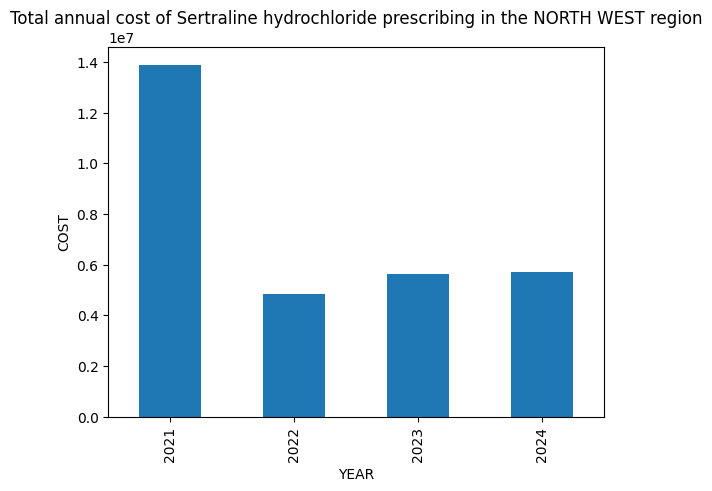

In [32]:
pca_regional_drug_summary_df.columns
shcl_northwest_df= pca_regional_drug_summary_df.query("BNF_CHEMICAL_SUBSTANCE=='Sertraline hydrochloride' and REGION_NAME=='NORTH WEST'")
shcl_northwest_df=shcl_northwest_df.groupby(by='YEAR')['COST'].sum()
# display(shcl_northwest_df)
shcl_northwest_df.plot(x='YEAR', y='COST', kind='bar')
plt.xlabel('YEAR')
plt.ylabel('COST')
plt.title('Total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region')
plt.show()







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

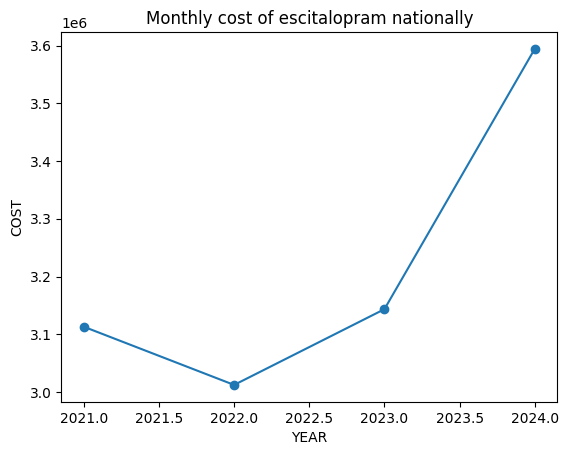

In [33]:
# display(pca_regional_drug_summary_df.columns)
monthly_esc_cost_df=pca_regional_drug_summary_df.query("BNF_CHEMICAL_SUBSTANCE=='Escitalopram'")
monthly_esc_cost_df=monthly_esc_cost_df.groupby(by='YEAR')['COST'].sum().round()
# display(monthly_esc_cost_df)
monthly_esc_cost_df.plot(x='YEAR', y='COST', kind='line', marker='o')
plt.xlabel('YEAR')
plt.ylabel('COST')
plt.title('Monthly cost of escitalopram nationally')
plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

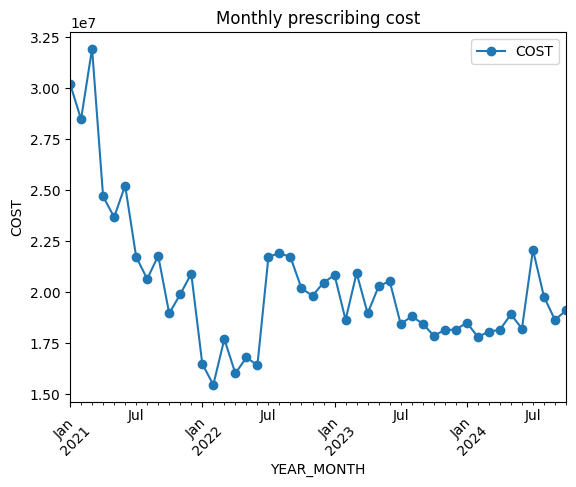

In [34]:
monthly_prescribing_cost_df=pca_regional_summary_df.groupby(by='YEAR_MONTH')['COST'].sum().reset_index()
# display(monthly_prescribing_cost_df)
#monthly_prescribing_cost_df.plot(x='YEAR_MONTH', y='COST', kind='line', marker='o')
monthly_prescribing_cost_df.plot(x='YEAR_MONTH', y='COST', kind='line', marker='o')
plt.xlabel('YEAR_MONTH')
plt.ylabel('COST')
plt.title('Monthly prescribing cost')
plt.xticks(rotation=45)
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [35]:
#creating a year column for ease
monthly_prescribing_cost_df['YEAR'] = monthly_prescribing_cost_df['YEAR_MONTH'].dt.year

monthly_prescribing_cost_df.groupby(by='YEAR')['COST'].describe()


,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2021,12.0,2.400827e+07,4.232435e+06,18949756.25,2.083549e+07,2.272424e+07,2.603658e+07,31933609.64
2022,12.0,1.872070e+07,2.481879e+06,15453991.47,1.645837e+07,1.875420e+07,2.077687e+07,21914896.72
2023,12.0,1.916780e+07,1.141344e+06,17859075.18,1.836279e+07,1.872291e+07,2.034416e+07,20934041.83
2024,10.0,1.891889e+07,1.249655e+06,17802904.89,1.816383e+07,1.856003e+07,1.905628e+07,22071625.09



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

Text(0.5, 1.0, 'National Monthly prescribing cost')

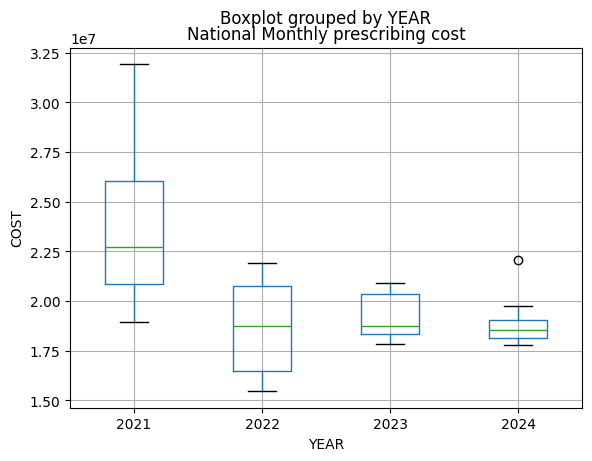

In [36]:
    monthly_prescribing_cost_df.boxplot(by='YEAR', column='COST')
    plt.xlabel('YEAR')
    plt.ylabel('COST')
    plt.title('National Monthly prescribing cost')

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

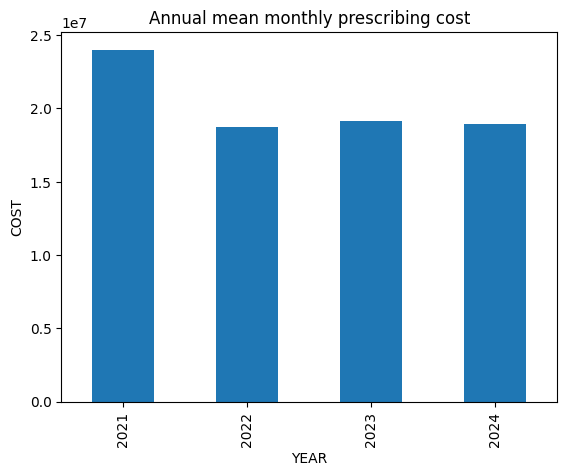

In [37]:
# monthly_prescribing_cost_df.groupby('YEAR')['COST'].mean()
monthly_prescribing_cost_df.groupby('YEAR')['COST'].mean().plot(kind='bar')
plt.xlabel('YEAR')
plt.ylabel('COST')
plt.title('Annual mean monthly prescribing cost')
plt.show()
  #annual_mean_national_monthly_cost_df= monthly_prescribing_cost_df.groupby()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [38]:
  pca_regional_drug_summary_df.pivot_table(index='YEAR', columns='REGION_NAME', values='COST', aggfunc=sum)

<ipython-input-38-95bb1fadb0fc>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pca_regional_drug_summary_df.pivot_table(index='YEAR', columns='REGION_NAME', values='COST', aggfunc=sum)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

*Total Annual Antidepressant Prescribing (Items and Cost)*

---

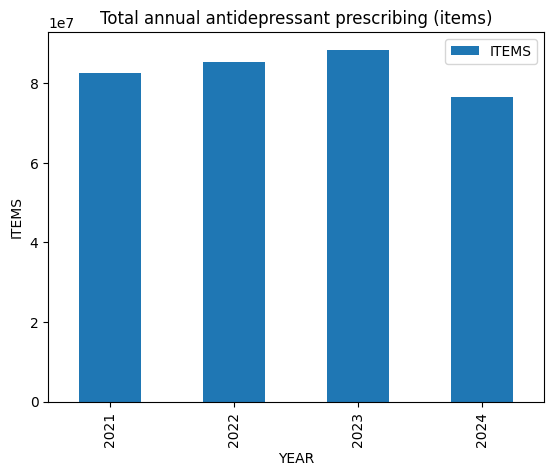

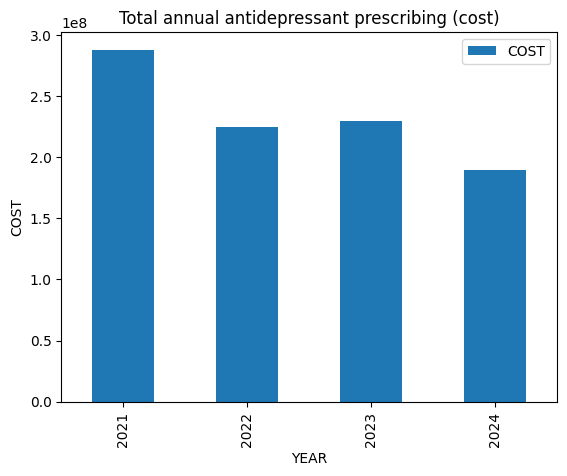

In [69]:
annual_antidepressant_prescribing_items_df=pca_regional_drug_summary_df.groupby(by='YEAR')['ITEMS'].sum().reset_index()
# annual_antidepressant_prescribing_items_df
annual_antidepressant_prescribing_cost_df=pca_regional_drug_summary_df.groupby(by='YEAR')['COST'].sum().reset_index()
# annual_antidepressant_prescribing_cost_df
annual_antidepressant_prescribing_items_df.plot(x='YEAR', y='ITEMS', kind='bar')
plt.xlabel('YEAR')
plt.ylabel('ITEMS')
plt.title('Total annual antidepressant prescribing (items)')
plt.show()
annual_antidepressant_prescribing_cost_df.plot(x='YEAR', y='COST', kind='bar')
plt.xlabel('YEAR')
plt.ylabel('COST')
plt.title('Total annual antidepressant prescribing (cost)')
plt.show()

*OBSERVATIONS*:

* When we analyze the data year over year, we observe an increase in the number of antidepressants prescribed from 2021 to 2023. However, there is a noticeable decline in prescriptions in 2024. In terms of cost, the trend is different; the price of antidepressants has been decreasing overall, with a significant drop observed between 2021 and 2022, followed by a slight increase from 2022 to 2023.

* On Comparing the 2 graphs, we also find that although the total number of items being prescribed continued to rise from 2021 to 2023, the total cost of antidepressants  were lower in the  latter years than 2021.

*Total Annual Antidepressant Prescribing Per Region Across the Years(Items and Cost)*

---



In [40]:
# display(pca_regional_drug_summary_df.columns)
annual_antidepressant_prescribing_items_per_region_df=pca_regional_drug_summary_df.pivot_table(index='YEAR', columns='REGION_NAME', values='ITEMS', aggfunc=sum)
annual_antidepressant_prescribing_items_per_region_df

<ipython-input-40-59356255ba53>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  annual_antidepressant_prescribing_items_per_region_df=pca_regional_drug_summary_df.pivot_table(index='YEAR', columns='REGION_NAME', values='ITEMS', aggfunc=sum)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9663288,8599587,15375576,17676819,12417071,10596746,8291455
2022,9887496,9255871,16066881,18255050,12779874,10804393,8355297
2023,10167005,9758068,16751001,19026635,13210529,11045891,8510674
2024,8713529,8282759,14476095,17131959,11378542,9420102,7179388


In [41]:
# for index, row in annual_antidepressant_prescribing_items_per_region_df.iterrows():
#     # print(row)
#     # plot for each row
#     row.plot(kind='bar')
#     plt.xlabel('REGION_NAME')
#     plt.ylabel('ITEMS')
#     plt.title(f'Annual anti-depressant prescribing (items) per region {index}')
#     plt.show()

In [42]:
annual_antidepressant_prescribing_cost_per_region_df=pca_regional_drug_summary_df.pivot_table(index='YEAR', columns='REGION_NAME', values='COST', aggfunc=sum)
annual_antidepressant_prescribing_cost_per_region_df

<ipython-input-42-130472c2bb0c>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  annual_antidepressant_prescribing_cost_per_region_df=pca_regional_drug_summary_df.pivot_table(index='YEAR', columns='REGION_NAME', values='COST', aggfunc=sum)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


In [43]:
# for index, row in annual_antidepressant_prescribing_cost_per_region_df.iterrows():
#     # print(row)
#     # plot for each row
#     row.plot(kind='bar')
#     plt.xlabel('REGION_NAME')
#     plt.ylabel('ITEMS')
#     plt.title(f'Annual anti-depressant prescribing (items) per region {index}')
#     plt.show()

*Observation*

There is a noticeable trend over the four years observed, indicating that the Northeast and Yorkshire have the highest levels of prescriptions, while the South West records the lowest. If we were to create a graph based on the table above, it would clearly illustrate that the pattern for prescriptions remains quite consistent across all years.
When examining the costs, the Northeast and Yorkshire, along with the Midlands, rank as the top two in expenses, with only slight differences in their margins. Conversely, the South West has the lowest overall costs. As noted earlier regarding total prescriptions, we also see a similar trend in the cost of antidepressants.

*Top 10 Prescribed Antidepressants across the Four years (Items and Cost)*

---


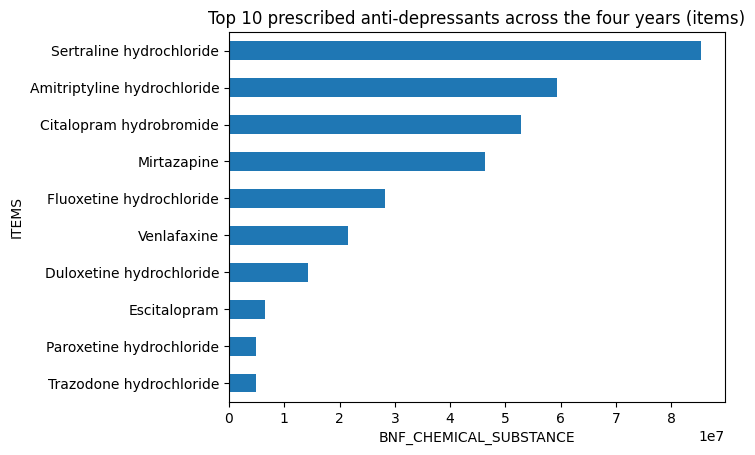

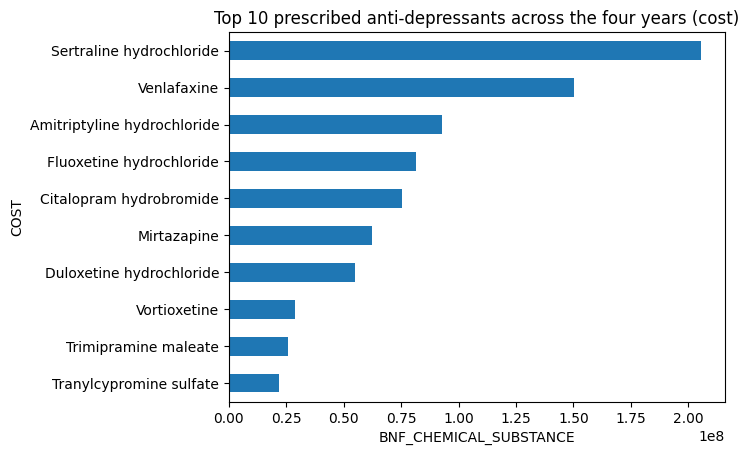

In [44]:
top_prescription = pca_regional_drug_summary_df.groupby(by='BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False)
# display(top_prescription.head(15))
top_prescription.head(10).iloc[::-1].plot(kind='barh')
plt.xlabel('BNF_CHEMICAL_SUBSTANCE')
plt.ylabel('ITEMS')
plt.title('Top 10 prescribed anti-depressants across the four years (items)')
plt.show()
top_prescription_cost = pca_regional_drug_summary_df.groupby(by='BNF_CHEMICAL_SUBSTANCE')['COST'].sum().sort_values(ascending=False)
# display(top_prescription_cost.head(10))
top_prescription_cost.head(10).iloc[::-1].plot(kind='barh')
plt.xlabel('BNF_CHEMICAL_SUBSTANCE')
plt.ylabel('COST')
plt.title('Top 10 prescribed anti-depressants across the four years (cost)')
plt.show()

*Observation*

**Sertraline hydrochloride** has been most frequently prescribed antidepressant  by a significant margin when compared to **Amitriptyline** **hydrochloride** which ranks as the second most commonly prescribed antidepressant. Notably, although **Venlafaxine** is the sixth most prescribed antidepressant, it is associated with the second highest cost among these medications.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


A time series visualization displaying the monthly trend of total antidepressant prescribing Items and costs will provide a clear view of the trends. Dividing into plots of 4 years will also help us anlayse the cycle of taking of antidepressants over the years

*Monthly Antidepressant Prescribing over 4 Years: 2021-2024 (Items and Cost)*

---

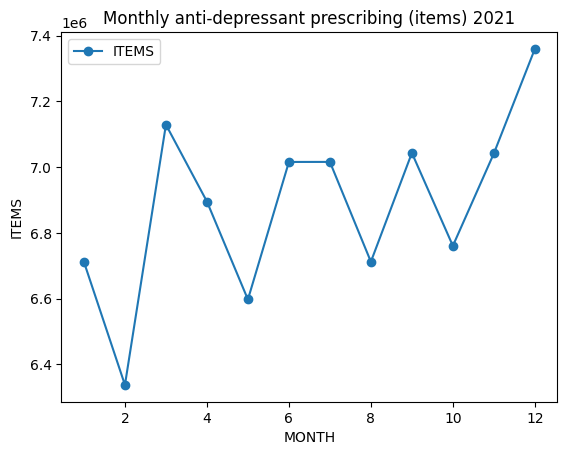

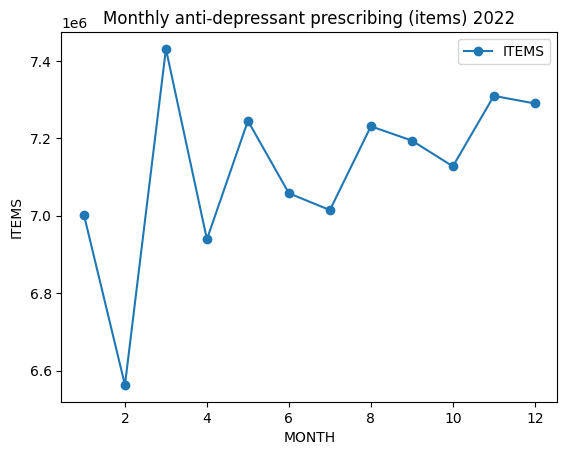

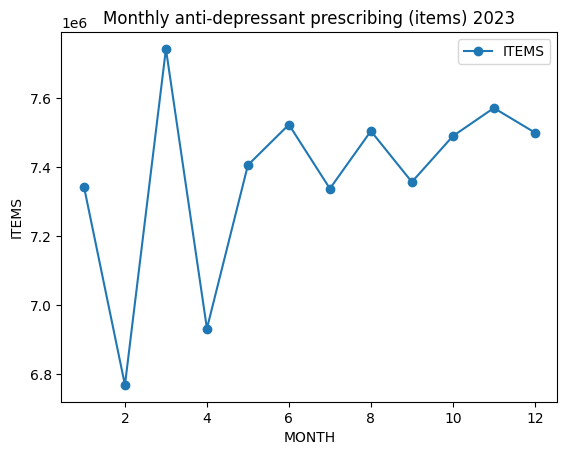

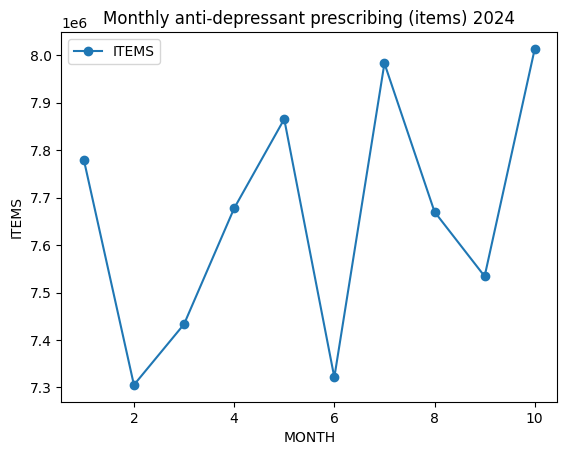

In [57]:
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month
for year in pca_regional_drug_summary_df['YEAR'].unique():
    # select only column where year match
    monthly_antidepressant_prescribing_items_df=pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR']==year].groupby('MONTH')['ITEMS'].sum().reset_index()
    # display(monthly_antidepressant_prescribing_items_df)
    monthly_antidepressant_prescribing_items_df.plot(x='MONTH', y='ITEMS', kind='line', marker ='o')
    plt.xlabel('MONTH')
    plt.ylabel('ITEMS')
    plt.title(f'Monthly anti-depressant prescribing (items) {year}')
    plt.show()

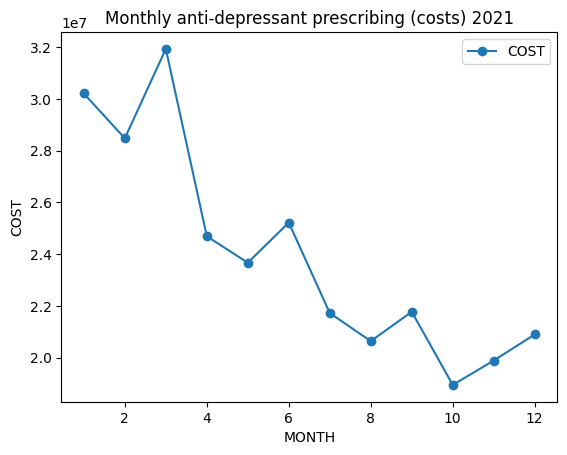

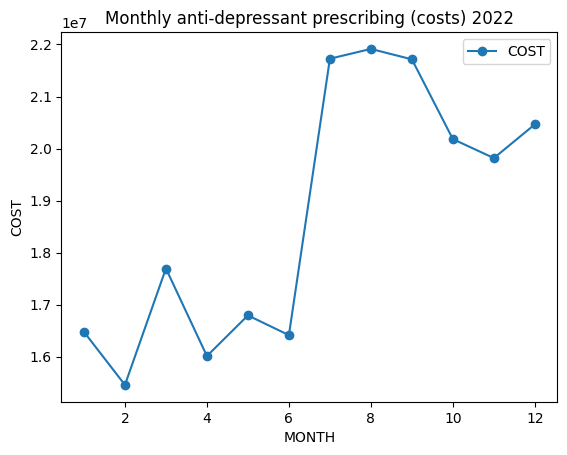

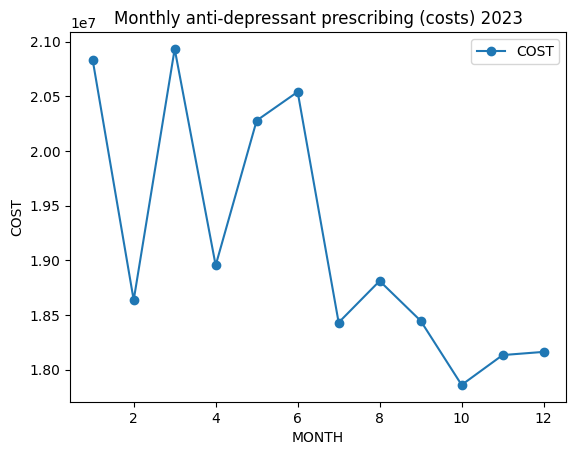

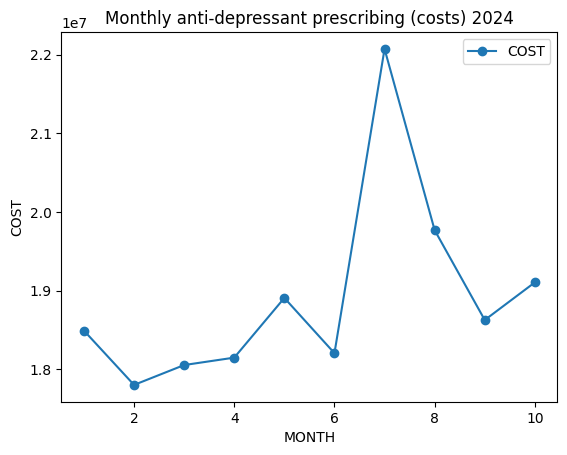

In [58]:
for year in pca_regional_drug_summary_df['YEAR'].unique():
    # select only column where year match
    monthly_antidepressant_prescribing_items_df=pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR']==year].groupby('MONTH')['COST'].sum().reset_index()
    # display(monthly_antidepressant_prescribing_items_df)
    monthly_antidepressant_prescribing_items_df.plot(x='MONTH', y='COST', kind='line', marker='o')
    plt.xlabel('MONTH')
    plt.ylabel('COST')
    plt.title(f'Monthly anti-depressant prescribing (costs) {year}')
    plt.show()

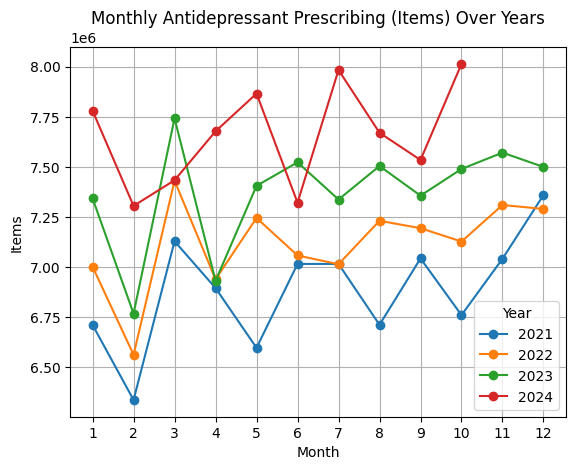

In [67]:

# Extract year and month from 'YEAR_MONTH'
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month

# Group by both YEAR and MONTH and sum the 'ITEMS'
monthly_antidepressant_prescribing_items_df = pca_regional_drug_summary_df.groupby(['YEAR', 'MONTH'])['ITEMS'].sum().reset_index()

# Pivot to have years as columns for better visualization
pivot_df = monthly_antidepressant_prescribing_items_df.pivot(index='MONTH', columns='YEAR', values='ITEMS')

# Plot all years on the same graph
pivot_df.plot(kind='line', marker='o')

plt.xlabel('Month')
plt.ylabel('Items')
plt.title('Monthly Antidepressant Prescribing (Items) Over Years')
plt.legend(title='Year')
plt.xticks(range(1, 13))  # Ensure x-axis has months 1 to 12
plt.grid(True)

plt.show()


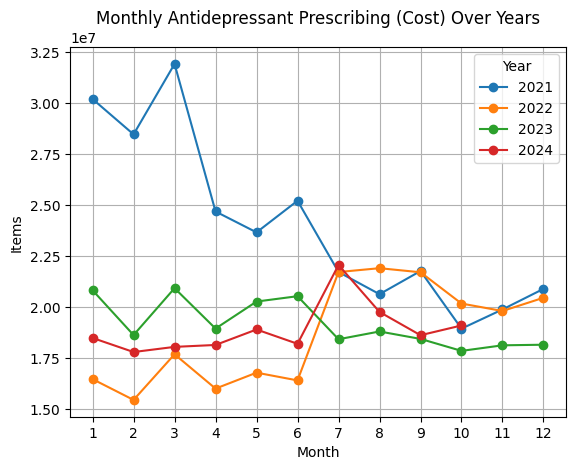

In [70]:

# Extract year and month from 'YEAR_MONTH'
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month

# Group by both YEAR and MONTH and sum the 'COST'
monthly_antidepressant_prescribing_cost_df = pca_regional_drug_summary_df.groupby(['YEAR', 'MONTH'])['COST'].sum().reset_index()

# Pivot to have years as columns for better visualization
pivot_df = monthly_antidepressant_prescribing_cost_df.pivot(index='MONTH', columns='YEAR', values='COST')

# Plot all years on the same graph
pivot_df.plot(kind='line', marker='o')

plt.xlabel('Month')
plt.ylabel('Items')
plt.title('Monthly Antidepressant Prescribing (Cost) Over Years')
plt.legend(title='Year')
plt.xticks(range(1, 13))  # Ensure x-axis has months 1 to 12
plt.grid(True)

plt.show()


*Top 10 Monthly Anti-depressant Prescribing over the Years(Items and Cost )*

---

<ipython-input-71-569dd630edec>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='ITEMS', aggfunc=sum).plot(kind='line', marker='o')


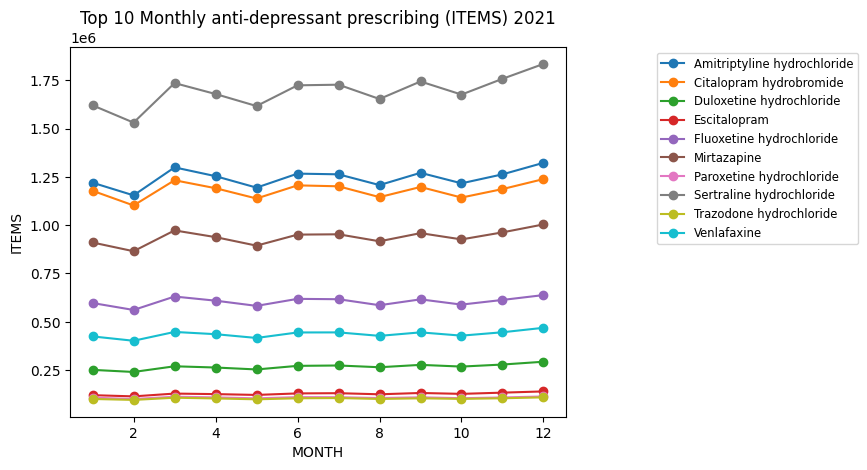

<ipython-input-71-569dd630edec>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='ITEMS', aggfunc=sum).plot(kind='line', marker='o')


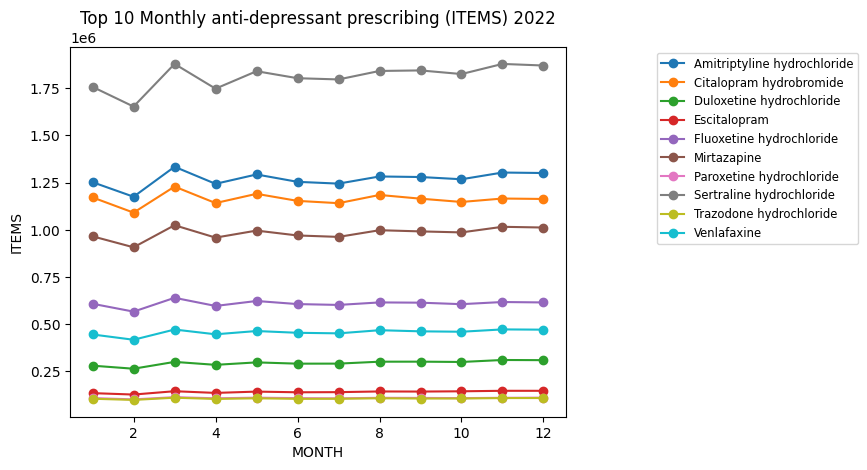

<ipython-input-71-569dd630edec>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='ITEMS', aggfunc=sum).plot(kind='line', marker='o')


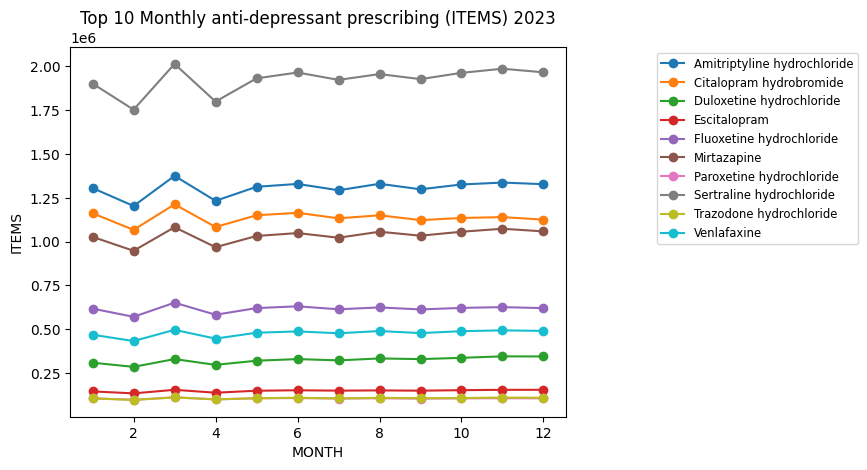

<ipython-input-71-569dd630edec>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='ITEMS', aggfunc=sum).plot(kind='line', marker='o')


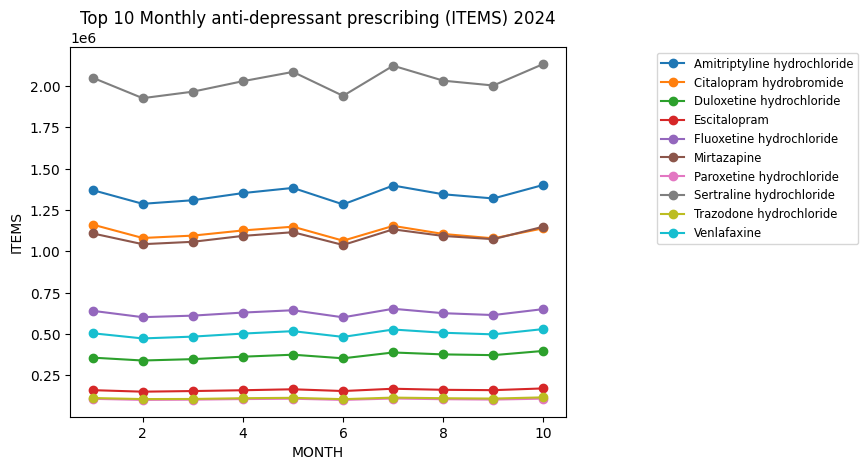

In [71]:
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month
for year in pca_regional_drug_summary_df['YEAR'].unique():
    # select only column where year match
    temp=pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR']==year].reset_index(drop=True)
    # display(temp)
    top10_names = temp.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(10).index
    temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='ITEMS', aggfunc=sum).plot(kind='line', marker='o')
    plt.xlabel('MONTH')
    plt.ylabel('ITEMS')
    plt.title(f'Top 10 Monthly anti-depressant prescribing (ITEMS) {year}')
    plt.legend(
        loc='upper right',
        bbox_to_anchor=(1.6, 1),
        ncol=1,
        fontsize='small',
    )
    plt.show()

<ipython-input-60-c59f48c61396>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST', aggfunc=sum).plot(kind='line',marker='o')


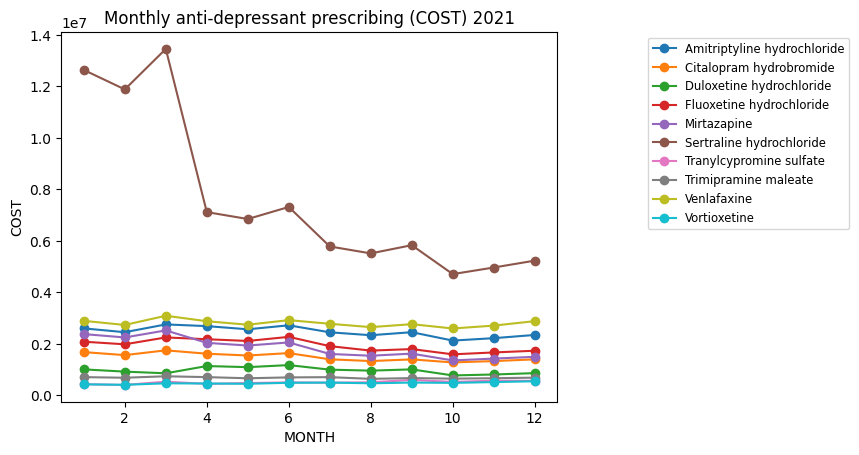

<ipython-input-60-c59f48c61396>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST', aggfunc=sum).plot(kind='line',marker='o')


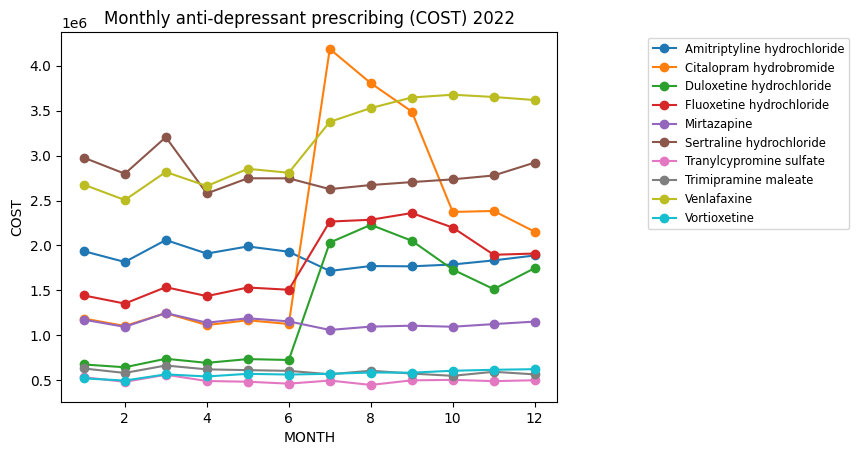

<ipython-input-60-c59f48c61396>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST', aggfunc=sum).plot(kind='line',marker='o')


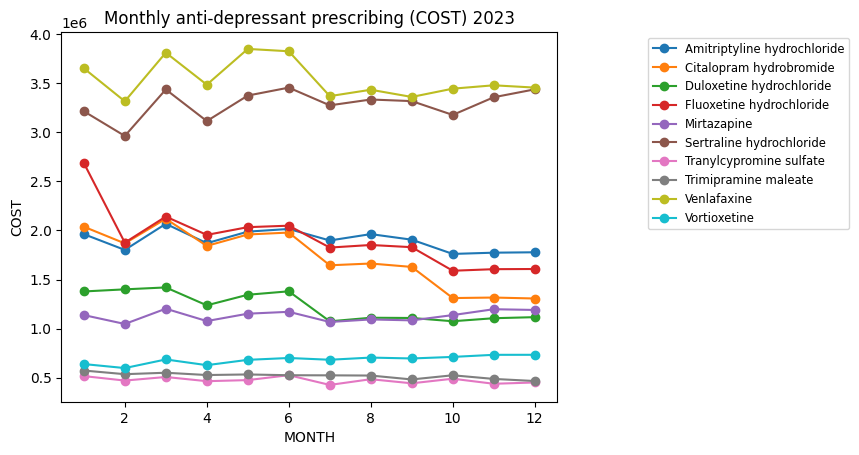

<ipython-input-60-c59f48c61396>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST', aggfunc=sum).plot(kind='line',marker='o')


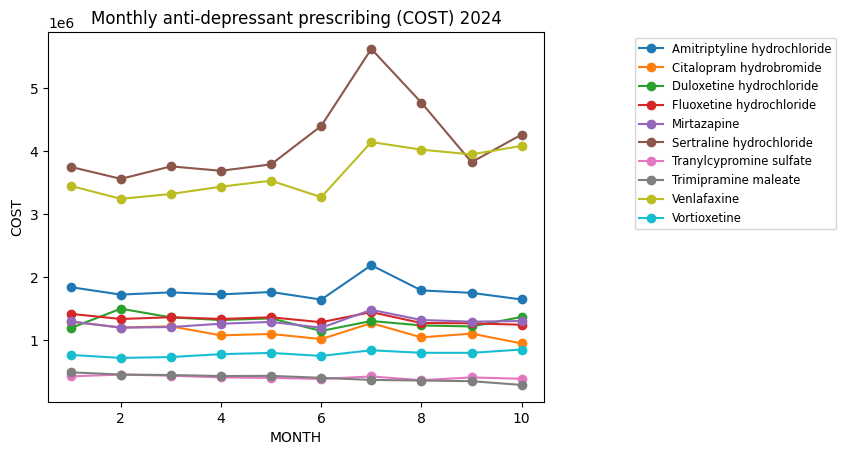

In [60]:
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month
for year in pca_regional_drug_summary_df['YEAR'].unique():
    # select only column where year match
    temp=pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR']==year].reset_index(drop=True)
    top10_names = temp.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().sort_values(ascending=False).head(10).index
    # display(temp.pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST', aggfunc=sum))
    temp[temp['BNF_CHEMICAL_SUBSTANCE'].isin(top10_names)].pivot_table(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST', aggfunc=sum).plot(kind='line',marker='o')
    plt.xlabel('MONTH')
    plt.ylabel('COST')
    plt.title(f'Monthly anti-depressant prescribing (COST) {year}')
    plt.legend(
        loc='upper right',
        bbox_to_anchor=(1.6, 1),
        ncol=1,
        fontsize='small',
    )
    plt.show()



#### **Objective**
This analysis examines the monthly trends in antidepressant prescribing volume and associated costs across different regions. The goal is to identify overall prescribing patterns and determine which specific antidepressants are driving these trends.

#### **Key Observations**



*   
The monthly number of total antidepressants being prescribed has shown a steady  increase over the years though marginal, with a few seasonal fluctuations.
*
From the plots, it is also clear that few months show consistent spikes and dips each year.
*
Every year during the month of March, the total number of antidepressants prescribed throughout the country experiences a spike after a dip in February.
* The total cost of antidepressant prescribed generally has a decreasing trend but exhibits greater variability, suggesting price changes or shifts in prescribing preferences.
Some months show notable spikes in prescribing or cost, which may be due to external factors such as policy changes or drug price adjustments.
*
However over the years, the monthly cost of prescriptions in certain months has undergone great reductions . For eg, In 2021 Jan, the monthly cost of  antidepressants  prescribed in the UK was approx $3 \times 10^7  $pounds. By 2024, the monthly cost of antidepressants in January being prescribed had fallen to almost half  approx $1.6 \times 10^7$pounds .


#### **Drivers of Trends**
* The top 10 most prescribed antidepressants account for the majority of the prescribing volume(approx 97%) with Sertraline hydrochloride  significantly leading(approx25%)
*
The costliest (monthly total) antidepressants is Sertraline hydrochloride which is also the most prescribed. The second costliest however, is Venlafaxine, which are not necessarily the most prescribed but contribute significantly to total spending.




## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



In [50]:
# pca_regional_drug_summary_df.groupby(by='BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(10)
# pca_regional_drug_summary_df.columns

We choose the 3 drugs :Sertraline hydrochloride', 'Venlafaxine' and 'Amitriptyline hydrochloride' based on our analysis from before

In [51]:
pca_regional_drug_summary_df['YEAR'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.year
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].dt.month

focused_antidepressants = ['Sertraline hydrochloride', 'Venlafaxine', 'Amitriptyline hydrochloride' ]
selected_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].isin(focused_antidepressants)]

*Percentages of the 3 Drugs on total Antidepressant Prescribing Volume and Cost.*

In [72]:
# total drugs and cost over all year
total_df = pca_regional_drug_summary_df[['ITEMS', 'COST']].sum()
# display(total_df)
# Percentage of total volume and cost for focused drugs
total_focused = selected_df.groupby('BNF_CHEMICAL_SUBSTANCE')[['ITEMS', 'COST']].sum()
# display(total_focused)
total_focused['ITEMS_PCT'] = total_focused['ITEMS'] / total_df['ITEMS'] * 100
total_focused['COST_PCT'] = total_focused['COST'] / total_df['COST'] * 100
display(total_focused[['ITEMS_PCT', 'COST_PCT']])

,ITEMS_PCT,COST_PCT
BNF_CHEMICAL_SUBSTANCE,,
Amitriptyline hydrochloride,17.795535,9.951122
Sertraline hydrochloride,25.640348,22.066947
Venlafaxine,6.439103,16.136197


*Percentages of the 3 Drugs on total Antidepressant Prescribing Volume and Cost over the years*

In [53]:
# yearly total drugs and cost
total_yearly = pca_regional_drug_summary_df.groupby('YEAR')[['ITEMS', 'COST']].sum()
# display(total_yearly)
# yearly total drugs and cost for focused drugs group by year and drug
total_yearly_focused = selected_df.groupby(['YEAR', 'BNF_CHEMICAL_SUBSTANCE'])[['ITEMS', 'COST']].sum()
# display(total_yearly_focused)
# Percentage of total volume and cost for focused drugs
total_yearly_focused['ITEMS_PCT'] = total_yearly_focused['ITEMS'] / total_yearly['ITEMS'] * 100
total_yearly_focused['COST_PCT'] = total_yearly_focused['COST'] / total_yearly['COST'] * 100
display(total_yearly_focused[['ITEMS_PCT', 'COST_PCT']])

ITEMS_PCT   COST_PCT
YEAR BNF_CHEMICAL_SUBSTANCE                           
2021 Amitriptyline hydrochloride  18.070781  10.317828
     Sertraline hydrochloride     24.567008  31.692142
     Venlafaxine                   6.325173  11.681875
2022 Amitriptyline hydrochloride  17.828980   9.976981
     Sertraline hydrochloride     25.462026  14.910341
     Venlafaxine                   6.392578  16.835648
2023 Amitriptyline hydrochloride  17.703915   9.906116
     Sertraline hydrochloride     26.076499  17.157664
     Venlafaxine                   6.479047  18.473400
2024 Amitriptyline hydrochloride  17.567130   9.416712
     Sertraline hydrochloride     26.493330  21.876191
     Venlafaxine                   6.567758  19.247200

*Monthly Mean Cost Per Item of a Drug (2021-2024)*

---

In [ ]:
monthly_prescribing_cost_df=pca_regional_summary_df.groupby(by='YEAR_MONTH')['COST'].sum().reset_index()


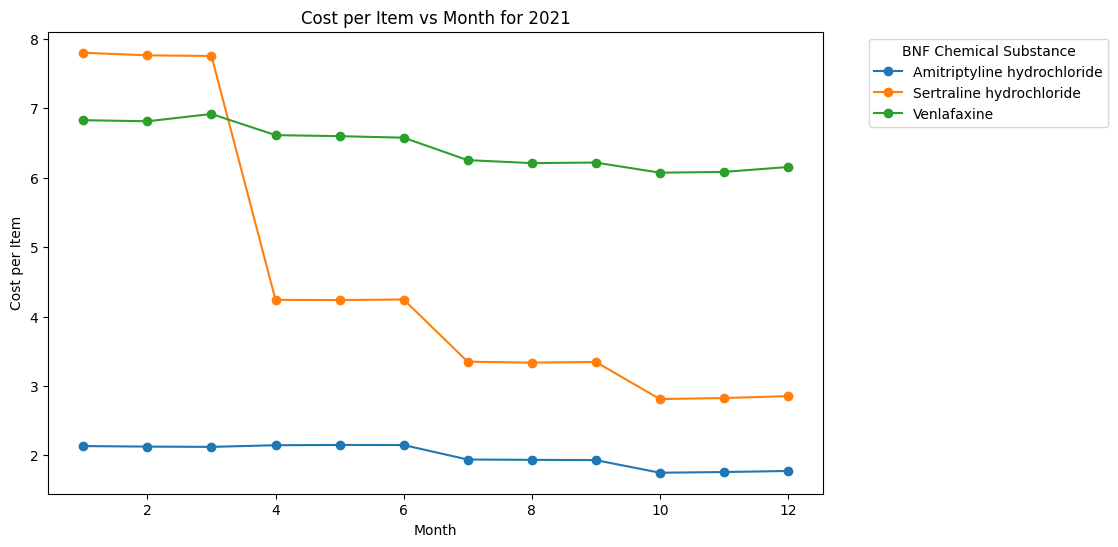

BNF_CHEMICAL_SUBSTANCE,Amitriptyline hydrochloride,Sertraline hydrochloride,Venlafaxine
MONTH,,,
1,2.133340,7.800754,6.828939
2,2.125671,7.763041,6.813059
3,2.121559,7.753595,6.918199
4,2.145930,4.239977,6.613408
5,2.149388,4.237306,6.598636
6,2.148233,4.245102,6.576505
7,1.939639,3.349157,6.253068
8,1.935048,3.335715,6.210063
9,1.930916,3.345291,6.218146


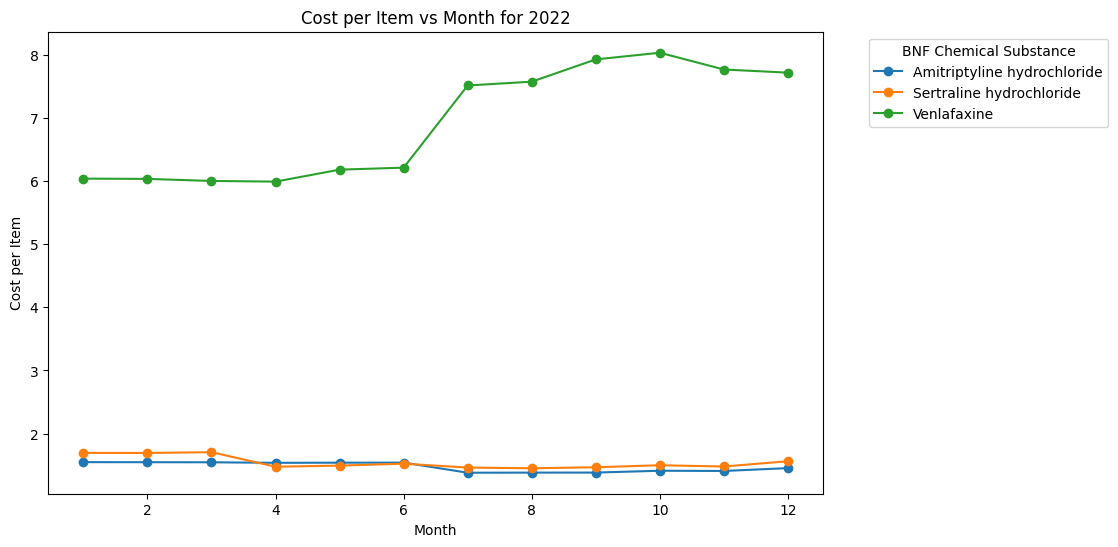

BNF_CHEMICAL_SUBSTANCE,Amitriptyline hydrochloride,Sertraline hydrochloride,Venlafaxine
MONTH,,,
1,1.547329,1.693691,6.036724
2,1.546558,1.692529,6.032425
3,1.545048,1.705117,5.999853
4,1.536643,1.475167,5.989201
5,1.538713,1.492477,6.178775
6,1.539902,1.522818,6.210367
7,1.379819,1.461530,7.511696
8,1.381515,1.450505,7.571792
9,1.382208,1.466116,7.924406


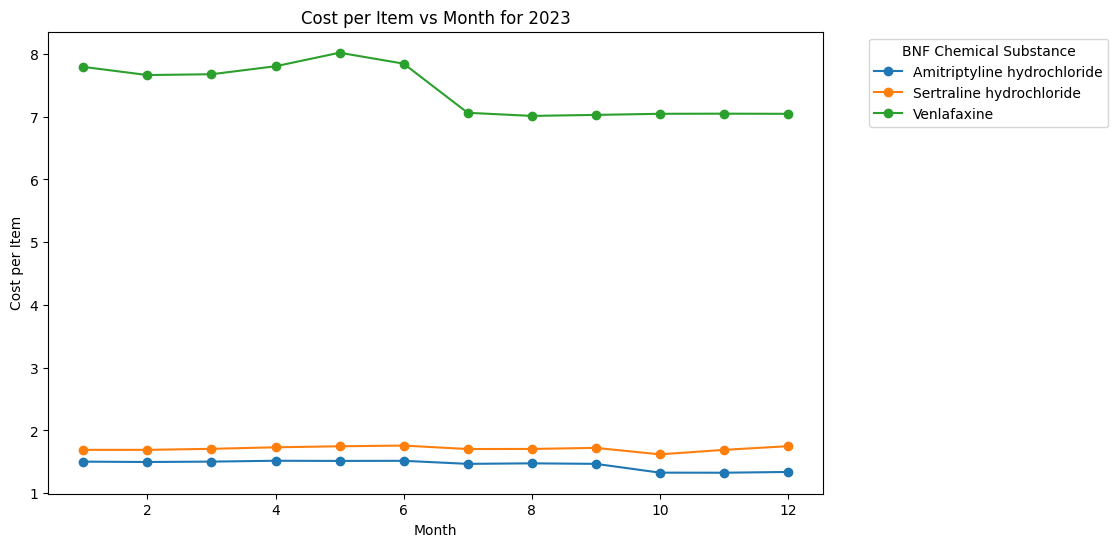

BNF_CHEMICAL_SUBSTANCE,Amitriptyline hydrochloride,Sertraline hydrochloride,Venlafaxine
MONTH,,,
1,1.504075,1.691811,7.792124
2,1.498147,1.691760,7.662125
3,1.504430,1.707903,7.675300
4,1.518047,1.732558,7.802350
5,1.515232,1.748553,8.017920
6,1.517141,1.760036,7.843714
7,1.468548,1.704614,7.061073
8,1.476809,1.706205,7.011367
9,1.468609,1.723156,7.027623


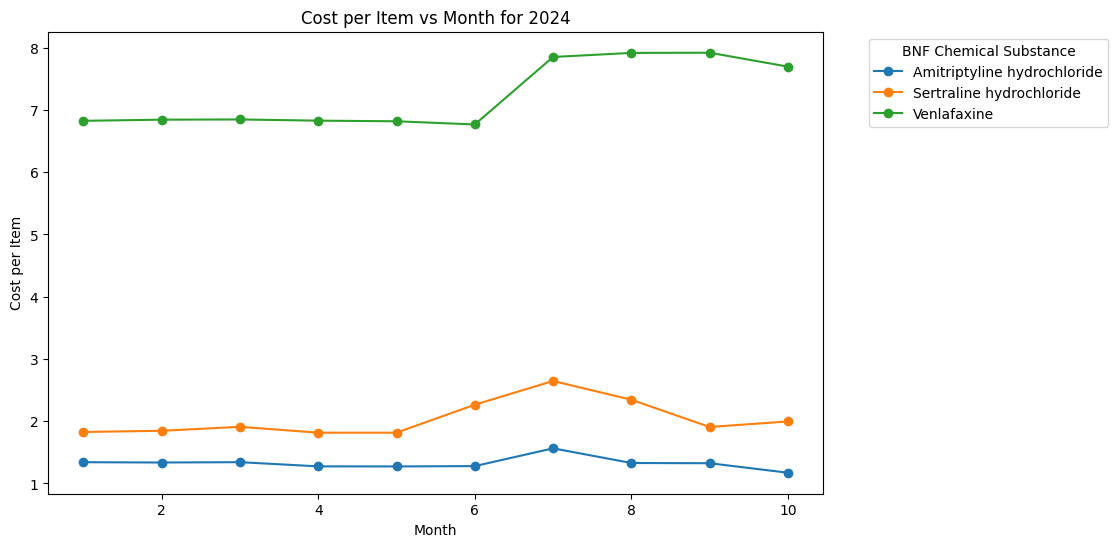

BNF_CHEMICAL_SUBSTANCE,Amitriptyline hydrochloride,Sertraline hydrochloride,Venlafaxine
MONTH,,,
1,1.341848,1.827474,6.824173
2,1.336780,1.846181,6.842642
3,1.342206,1.909984,6.846189
4,1.274873,1.815898,6.826771
5,1.273861,1.815909,6.816751
6,1.279041,2.265243,6.765667
7,1.564246,2.646233,7.849571
8,1.328959,2.344810,7.914839
9,1.325108,1.907463,7.917823


In [54]:
# Mean cost per item in relation a drug
for year in selected_df['YEAR'].unique():
    monthly_df = selected_df[selected_df['YEAR'] == year]\
        .groupby(['MONTH','BNF_CHEMICAL_SUBSTANCE'])[['ITEMS', 'COST']].sum()\
        .reset_index()

    # Calculate cost per item
    monthly_df['COST_PER_ITEM'] = monthly_df['COST'] / monthly_df['ITEMS']

    # Pivot so months are index and each column is a BNF_CHEMICAL_SUBSTANCE
    pivot_df = monthly_df.pivot(index='MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='COST_PER_ITEM')

    pivot_df.plot(marker='o', figsize=(10,6))
    plt.xlabel('Month')
    plt.ylabel('Cost per Item')
    plt.title(f'Cost per Item vs Month for {year}')
    plt.legend(title='BNF Chemical Substance', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    display(pivot_df)

*Scatter plot Between Antidepressent Prescribing Cost and Items*

---


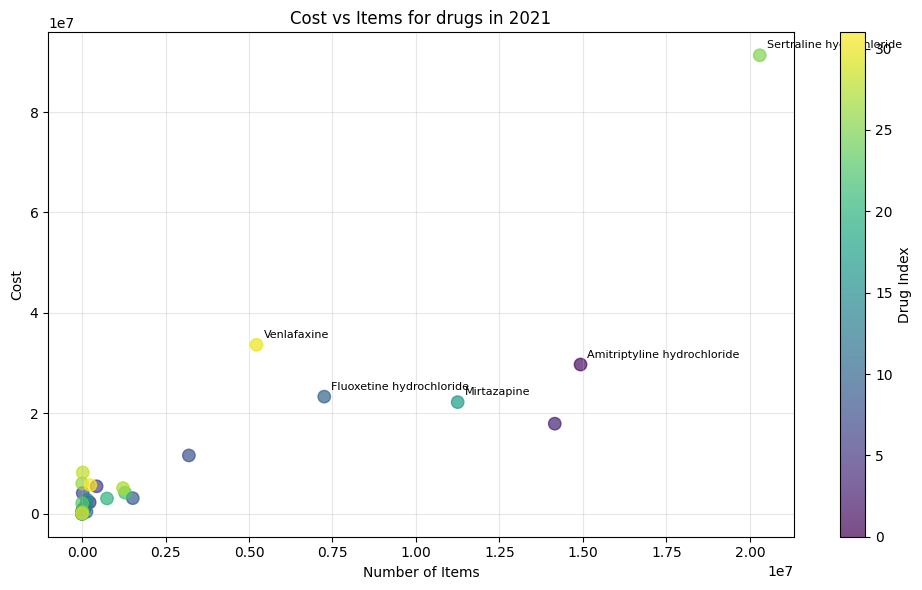

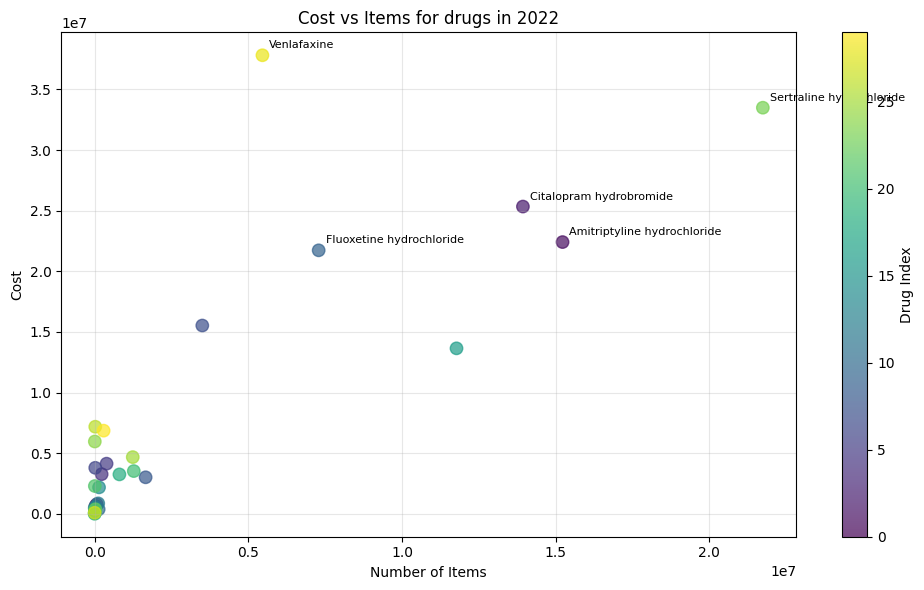

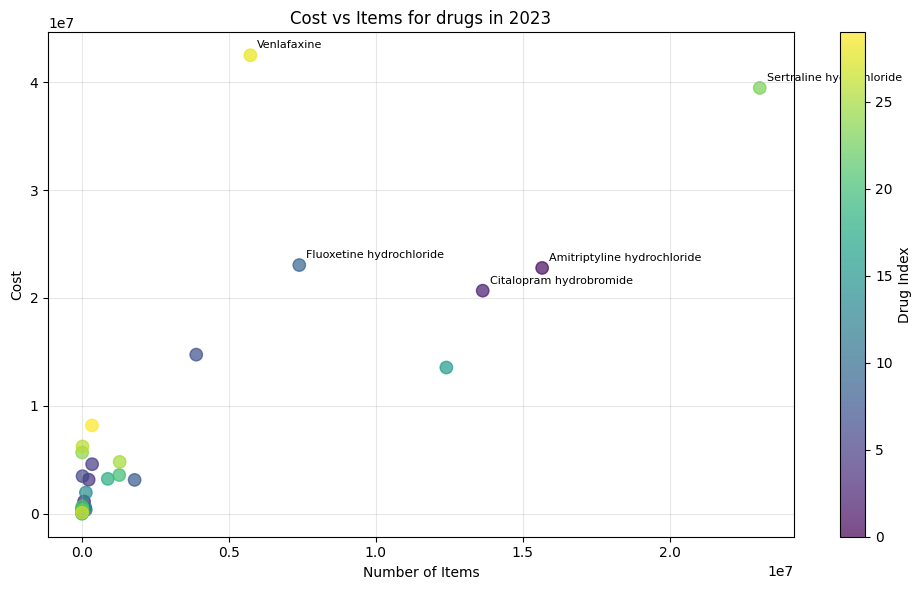

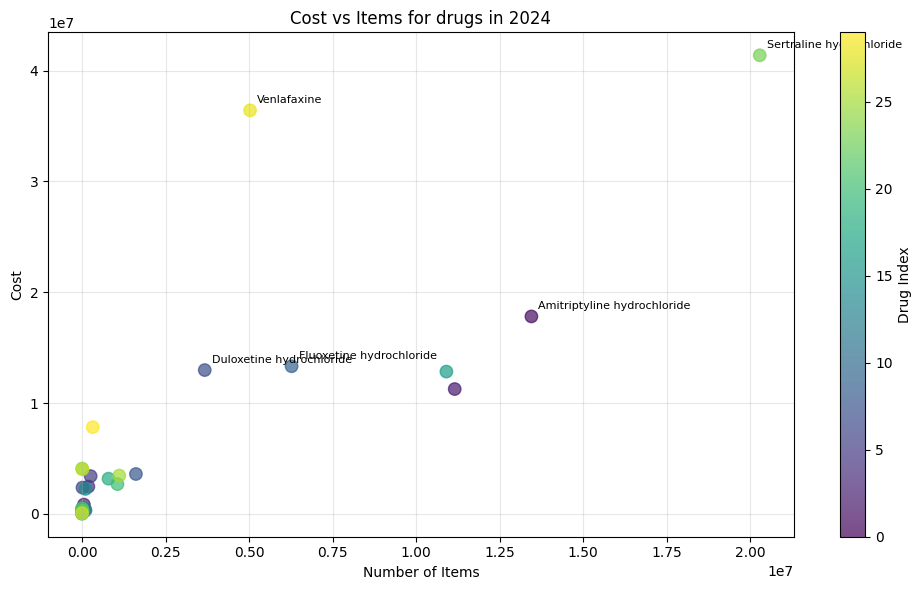

In [55]:
for year in pca_regional_drug_summary_df['YEAR'].unique():
    temp = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == year].reset_index(drop=True)
    temp = temp.groupby('BNF_CHEMICAL_SUBSTANCE')[['ITEMS', 'COST']].sum().reset_index()

    plt.figure(figsize=(10, 6))

    scatter = plt.scatter(
        temp['ITEMS'],
        temp['COST'],
        c=range(len(temp)),
        cmap='viridis',
        alpha=0.7,
        s=80
    )

    # Add labels for the top 5 drugs by cost
    top_drugs = temp.nlargest(5, 'COST')
    for i, row in top_drugs.iterrows():
        plt.annotate(
            row['BNF_CHEMICAL_SUBSTANCE'],
            (row['ITEMS'], row['COST']),
            textcoords="offset points",
            xytext=(5, 5),
            ha='left',
            fontsize=8
        )

    plt.xlabel('Number of Items')
    plt.ylabel('Cost')
    plt.title(f'Cost vs Items for drugs in {year}')
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Drug Index')
    plt.tight_layout()
    plt.show()

*Constructing Mean Cost Per Item of the antidepressents Column Table*

In [73]:
# FIND MONTHLY COST PER ITEM

#selecting rows which are only either 'Sertraline hydrochloride', 'Venlafaxine', 'Amitriptyline hydrochloride'
monthly_cost_peritem_perdrug_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].isin(['Sertraline hydrochloride', 'Venlafaxine', 'Amitriptyline hydrochloride'])]

monthly_cost_peritem_perdrug_df=monthly_cost_peritem_perdrug_df.groupby(by=['YEAR_MONTH','BNF_CHEMICAL_SUBSTANCE'])[['COST','ITEMS']].sum().reset_index()
monthly_cost_peritem_perdrug_df['cost_per_item'] = monthly_cost_peritem_perdrug_df['COST'] / monthly_cost_peritem_perdrug_df['ITEMS']
display(monthly_cost_peritem_perdrug_df)



,YEAR_MONTH,BNF_CHEMICAL_SUBSTANCE,COST,ITEMS,cost_per_item
0,2021-01-01,Amitriptyline hydrochloride,2601843.31,1219610,2.133340
1,2021-01-01,Sertraline hydrochloride,12639289.40,1620265,7.800754
2,2021-01-01,Venlafaxine,2894500.59,423858,6.828939
3,2021-02-01,Amitriptyline hydrochloride,2453387.50,1154171,2.125671
4,2021-02-01,Sertraline hydrochloride,11883267.56,1530749,7.763041
...,...,...,...,...,...
133,2024-09-01,Sertraline hydrochloride,3820822.48,2003091,1.907463
134,2024-09-01,Venlafaxine,3944429.62,498171,7.917823
135,2024-10-01,Amitriptyline hydrochloride,1644333.77,1402113,1.172754
136,2024-10-01,Sertraline hydrochloride,4258753.89,2133595,1.996046


*Mean Cost Per Item of Each Drug*

In [74]:
#mean_cost_per_item(mean across the months)
display(monthly_cost_peritem_perdrug_df.groupby(by='BNF_CHEMICAL_SUBSTANCE')['cost_per_item'].mean())

,cost_per_item
BNF_CHEMICAL_SUBSTANCE,
Amitriptyline hydrochloride,1.571491
Sertraline hydrochloride,2.477400
Venlafaxine,6.992048


*Summary Table for Mean Cost Per Item*

In [ ]:
monthly_cost_peritem_perdrug_df.groupby(by='BNF_CHEMICAL_SUBSTANCE')['cost_per_item'].describe()


,count,mean,std,min,25%,50%,75%,max
BNF_CHEMICAL_SUBSTANCE,,,,,,,,
Amitriptyline hydrochloride,46.0,1.571491,0.280255,1.172754,1.351609,1.504253,1.703128,2.149388
Sertraline hydrochloride,46.0,2.477400,1.608436,1.450505,1.691773,1.755092,2.769566,7.800754
Venlafaxine,46.0,6.992048,0.675886,5.989201,6.333927,6.882194,7.689761,8.030315


*Distribution of Mean cost per item for each drug across months*

(array([1, 2, 3]),
 [Text(1, 0, 'Amitriptyline hydrochloride'),
  Text(2, 0, 'Sertraline hydrochloride'),
  Text(3, 0, 'Venlafaxine')])

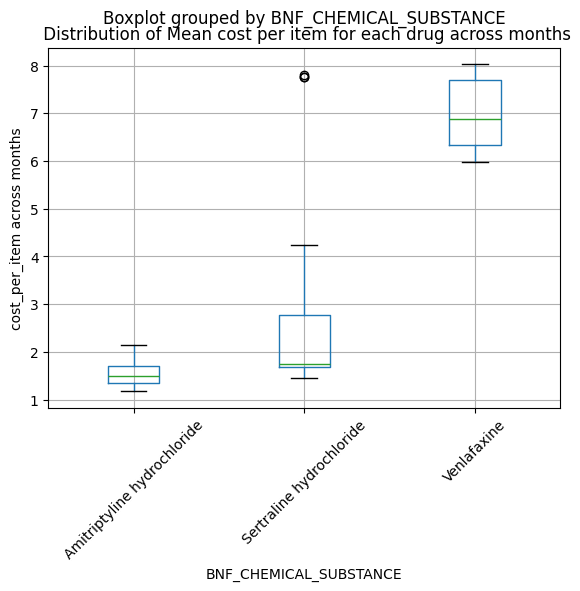

In [ ]:
import matplotlib.pyplot as plt
monthly_cost_peritem_perdrug_df.boxplot(by='BNF_CHEMICAL_SUBSTANCE', column='cost_per_item')
plt.title(' Distribution of Mean cost per item for each drug across months')
plt.xlabel('BNF_CHEMICAL_SUBSTANCE')
plt.ylabel('cost_per_item across months')
plt.xticks(rotation=45)



*Cost Per Item of each drug over the months*

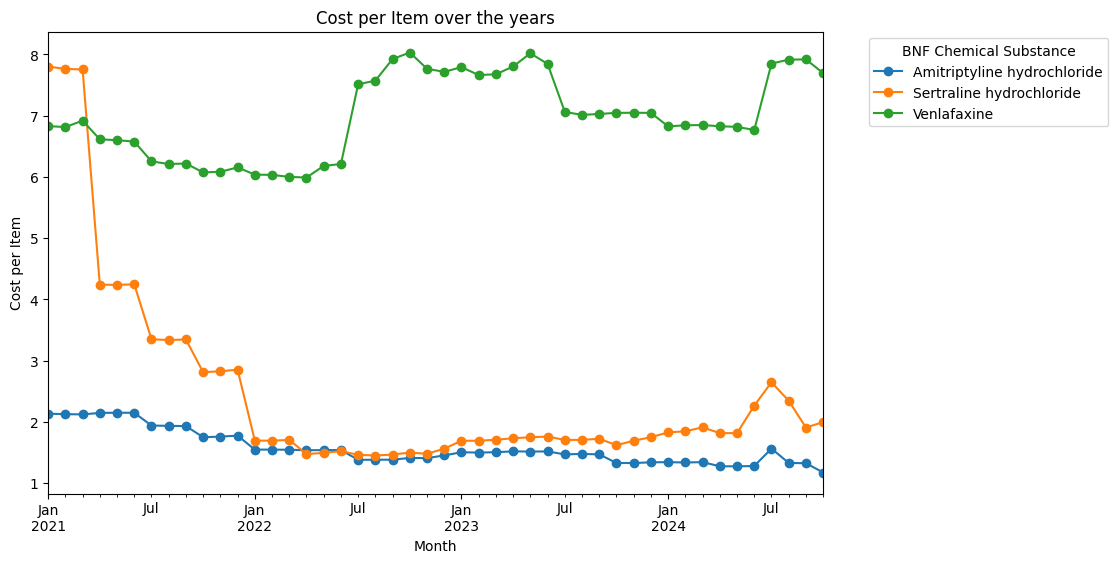

In [ ]:
pivot_df = monthly_cost_peritem_perdrug_df.pivot(index='YEAR_MONTH', columns='BNF_CHEMICAL_SUBSTANCE', values='cost_per_item')

pivot_df.plot(marker='o', figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Cost per Item')
plt.title(f'Cost per Item over the years')
plt.legend(title='BNF Chemical Substance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


*Mean Cost Per Item of each drug over the months*

In [ ]:
display(pivot_df)

BNF_CHEMICAL_SUBSTANCE,Amitriptyline hydrochloride,Sertraline hydrochloride,Venlafaxine
YEAR_MONTH,,,
2021-01-01,2.133340,7.800754,6.828939
2021-02-01,2.125671,7.763041,6.813059
2021-03-01,2.121559,7.753595,6.918199
2021-04-01,2.145930,4.239977,6.613408
2021-05-01,2.149388,4.237306,6.598636
2021-06-01,2.148233,4.245102,6.576505
2021-07-01,1.939639,3.349157,6.253068
2021-08-01,1.935048,3.335715,6.210063
2021-09-01,1.930916,3.345291,6.218146


#### **Objective**
This study examines the role of Amitriptyline hydrochloride,Sertraline hydrochloride and Venlafaxine in national antidepressant prescribing trends, focusing on their contribution to total volume and cost, the mean cost per item, and distribution trends. These three drugs were selected due to their high prescribing volume and cost impact.

#### **Key Observations**



*    Amitriptyline hydrochloride,Sertraline hydrochloride	 and Venlafaxine account for approximately 50% of all antidepressant prescriptions nationwide, with Sertraline hydrochloride having the highest prescription volume(25%)
* Sertraline hydrochloride accounts for the highest individual contribution (22%) to prescription costs, while these three drugs together make up approximately 48% of the total cost.
* From the data, we can see that the mean cost per item   for Amitriptyline hydrochloride and Venlafaxine has remained largely stable, while Sertraline hydrochloride shows  variability-7.8 in Jan 2021 to 1.6 in Jan 2023 possibly due to pricing adjustments or supply chain fluctuations.
